Русакова Дарья, ЭК-51, Вариант-6

In [1]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!pip install sklearn
#!pip install seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('cw.csv', sep=';')

In [4]:
df

,"Trade_are,_sq_m",Floor,Number_of_employees_in_the_store,Type,Google_rating,Number_of_checks_per_month,Average_check,Average_income_of_the_population_UAH,The_average_population,Fast_food,Takeaway_coffee,Pizzeria,Highway_street,Intra-quarter_road
0,9.00,1,1,Social,3.0,1230,76.85,13884.0,3807.0,1,1,0,1,0
1,22.00,1,1,Social,4.1,2715,84.86,11700.0,9086.0,0,0,0,1,0
2,13.00,1,1,Social,3.0,878,112.02,6786.0,6383.0,0,0,0,1,0
3,18.00,1,1,Standard,3.0,2346,119.80,12948.0,4.0,1,1,1,1,0
4,25.00,1,1,Social,4.0,2542,94.88,11427.0,426.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,40.78,1,3,Premium,4.0,13552,107.37,9399.0,12018.0,0,0,0,1,1
65,21.50,1,2,Premium,2.3,7598,89.13,14079.0,10121.0,0,0,0,0,0
66,115.23,1,1,Standard,3.0,5431,105.62,11427.0,7221.0,0,0,0,1,0
67,34.80,1,2,Social,4.3,4375,168.07,13338.0,3137.0,0,0,0,0,0


Из-за некорректной загрузки файла с данными были заменены все слова латиницы на английские.

In [5]:
# Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Trade_are,_sq_m                       69 non-null     float64
 1   Floor                                 69 non-null     int64  
 2   Number_of_employees_in_the_store      69 non-null     int64  
 3   Type                                  69 non-null     object 
 4   Google_rating                         69 non-null     float64
 5   Number_of_checks_per_month            69 non-null     int64  
 6   Average_check                         62 non-null     float64
 7   Average_income_of_the_population_UAH  64 non-null     float64
 8   The_average_population                64 non-null     float64
 9   Fast_food                             69 non-null     int64  
 10  Takeaway_coffee                       69 non-null     int64  
 11  Pizzeria             

По полученной информации делаем вывод о том, что в исследуемом датасете 69 элементов и 14 параметров. Параметр Type является категориальным, в дальнейшем его необходимо будет преобразовать в числовой при помощи кодирования данных. Также наблюдаются пропуски в 3-х факторах, которые необходимо будет заполнить.

In [7]:
df.describe()

,"Trade_are,_sq_m",Floor,Number_of_employees_in_the_store,Google_rating,Number_of_checks_per_month,Average_check,Average_income_of_the_population_UAH,The_average_population,Fast_food,Takeaway_coffee,Pizzeria,Highway_street,Intra-quarter_road
count,69.000000,69.0,69.000000,69.000000,69.000000,62.000000,64.000000,64.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,34.872145,1.0,1.869565,3.810145,7105.028986,95.897581,11306.843750,6061.312500,0.202899,0.217391,0.086957,0.449275,0.376812
std,21.704293,0.0,0.838645,0.695605,4052.584212,19.192685,2438.706261,4409.636752,0.405104,0.415493,0.283836,0.501065,0.488137
min,4.000000,1.0,1.000000,1.800000,878.000000,65.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.0,1.000000,3.000000,3734.000000,82.420000,10095.750000,1615.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.500000,1.0,2.000000,4.000000,6694.000000,93.855000,11680.500000,6503.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,1.0,2.000000,4.300000,8548.000000,102.787500,13074.750000,9598.500000,0.000000,0.000000,0.000000,1.000000,1.000000
max,119.300000,1.0,4.000000,5.000000,17537.000000,168.070000,14937.000000,14157.000000,1.000000,1.000000,1.000000,1.000000,1.000000


По первичному анализу статистических показателей видим, что выбросы присудствуют в Trade_are_sq_m, Average_check. Также выброс замечен в Average_income_of_the_population_UAH, где минимальное значение выходит за порог 3-х сигм, но в этой переменной есть пропущенные значения, которые и могут давать такую статистику. 

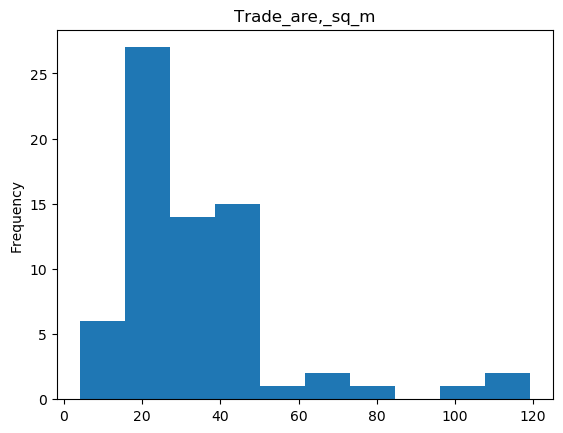

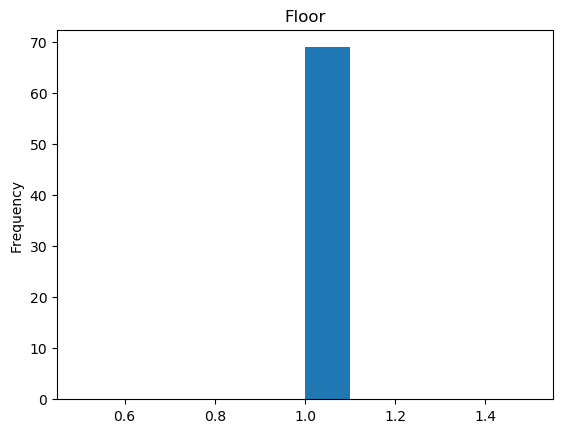

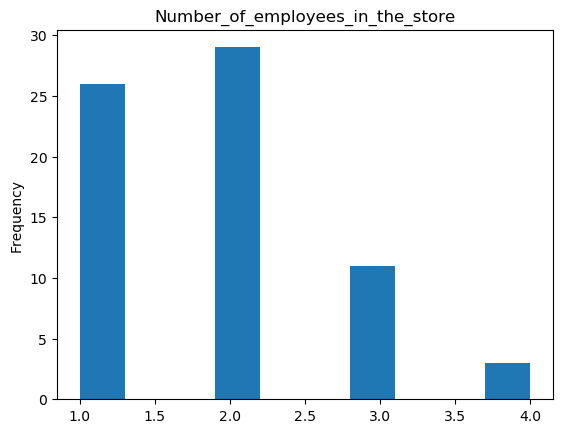

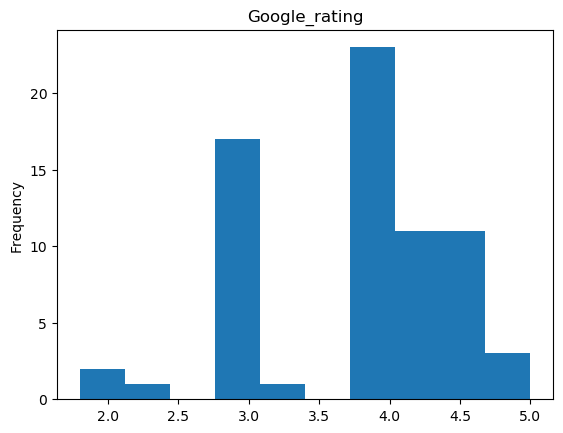

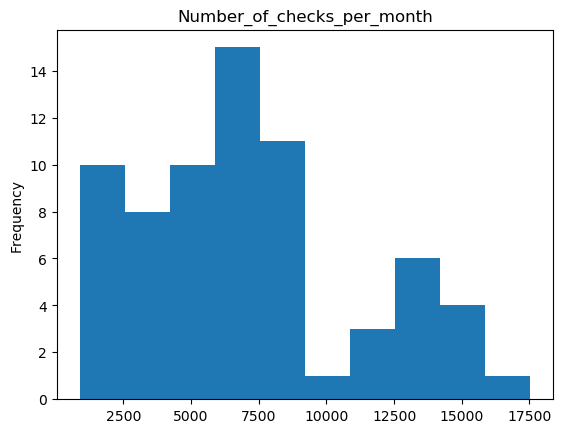

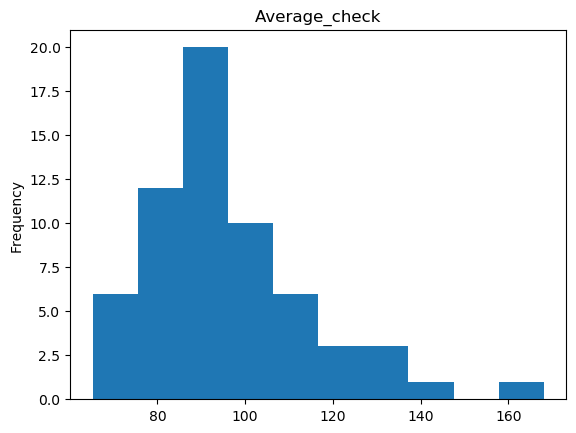

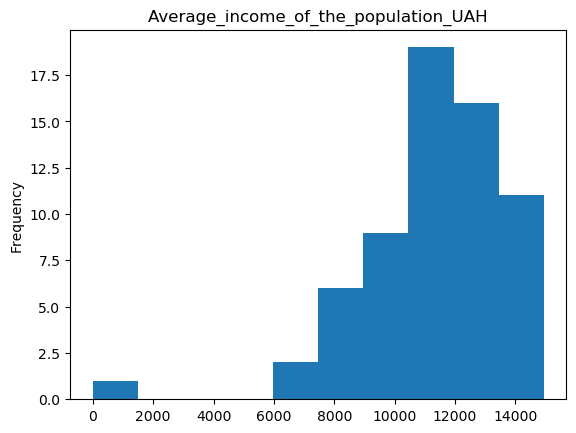

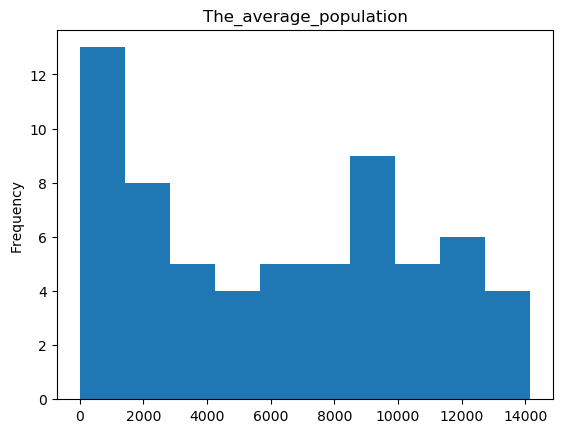

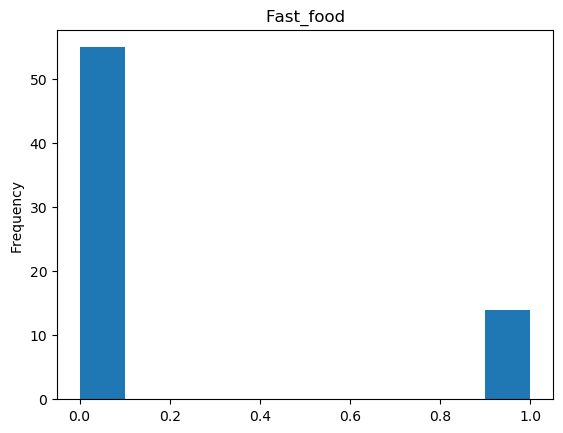

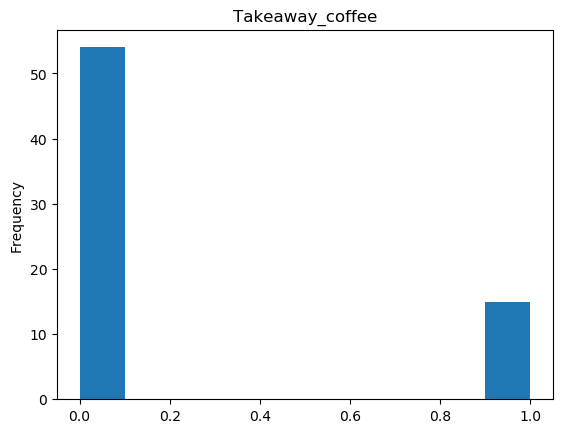

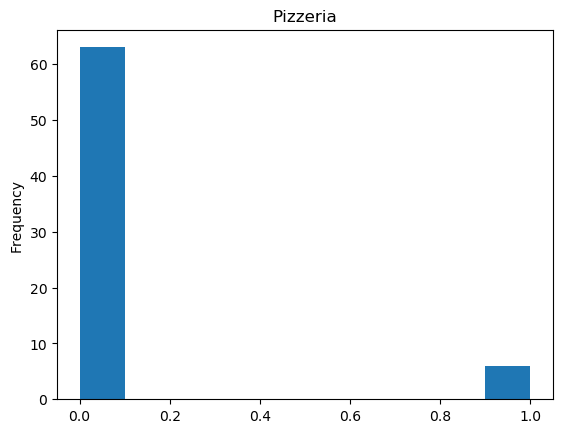

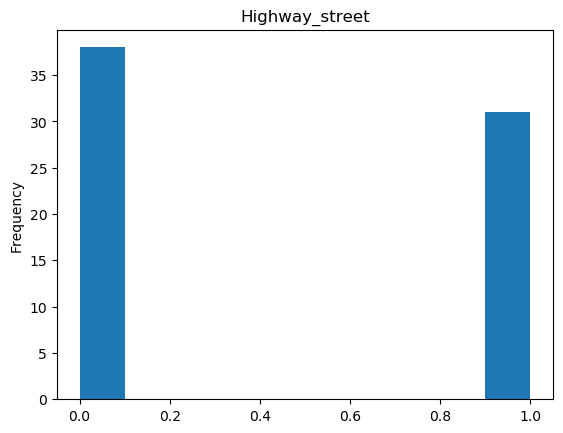

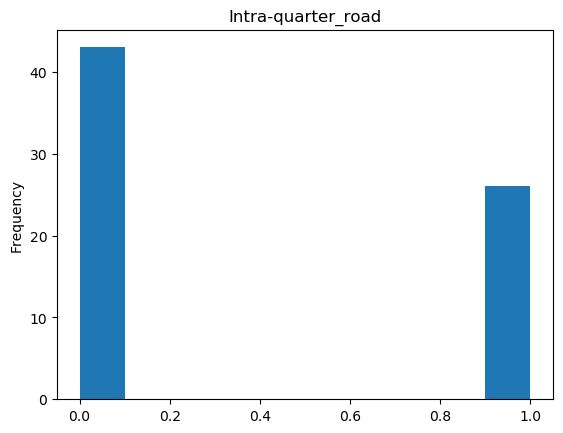

In [8]:
df['Trade_are,_sq_m'].plot(kind = 'hist')
plt.title('Trade_are,_sq_m')
plt.show()
df['Floor'].plot(kind = 'hist')
plt.title('Floor')
plt.show()
df['Number_of_employees_in_the_store'].plot(kind = 'hist')
plt.title('Number_of_employees_in_the_store')
plt.show()
df['Google_rating'].plot(kind = 'hist')
plt.title('Google_rating')
plt.show()
df['Number_of_checks_per_month'].plot(kind = 'hist')
plt.title('Number_of_checks_per_month')
plt.show()
df['Average_check'].plot(kind = 'hist')
plt.title('Average_check')
plt.show()
df['Average_income_of_the_population_UAH'].plot(kind = 'hist')
plt.title('Average_income_of_the_population_UAH')
plt.show()
df['The_average_population'].plot(kind = 'hist')
plt.title('The_average_population')
plt.show()
df['Fast_food'].plot(kind = 'hist')
plt.title('Fast_food')
plt.show()
df['Takeaway_coffee'].plot(kind = 'hist')
plt.title('Takeaway_coffee')
plt.show()
df['Pizzeria'].plot(kind = 'hist')
plt.title('Pizzeria')
plt.show()
df['Highway_street'].plot(kind = 'hist')
plt.title('Highway_street')
plt.show()
df['Intra-quarter_road'].plot(kind = 'hist')
plt.title('Intra-quarter_road')
plt.show()

Видим, что параметр Floor имеет во всех строках одинаковое значение, равное 1. Дальнейшее его рассмотрение не даст никаких значительных результатов, поэтому можем извлечь этот показатель из датасета. 
Также сразу бросается в глаза то, что 5-ть последних параметров являются бинарными, то есть имеют значение либо 0, либо 1.
Остальные параметры я буду немного видоизменять благодаря логарифмированию, чтобы приблизить данные к виду нормального распределения для более качественного построения регрессии.
Number_of_employees_in_the_store также по графику не очень напоминает нормальное распределение, но его я не буду изменить в силу того, что переменная имеет маленький диапазон значений, и логарифмирование, на мой взляд, не будет иметь столь весомого значения. 

In [9]:
df = df.drop(['Floor'], axis='columns', inplace=False)
df.head(5)

,"Trade_are,_sq_m",Number_of_employees_in_the_store,Type,Google_rating,Number_of_checks_per_month,Average_check,Average_income_of_the_population_UAH,The_average_population,Fast_food,Takeaway_coffee,Pizzeria,Highway_street,Intra-quarter_road
0,9.0,1,Social,3.0,1230,76.85,13884.0,3807.0,1,1,0,1,0
1,22.0,1,Social,4.1,2715,84.86,11700.0,9086.0,0,0,0,1,0
2,13.0,1,Social,3.0,878,112.02,6786.0,6383.0,0,0,0,1,0
3,18.0,1,Standard,3.0,2346,119.80,12948.0,4.0,1,1,1,1,0
4,25.0,1,Social,4.0,2542,94.88,11427.0,426.0,0,0,0,0,0


In [10]:
df.isnull().sum()

Trade_are,_sq_m                         0
Number_of_employees_in_the_store        0
Type                                    0
Google_rating                           0
Number_of_checks_per_month              0
Average_check                           7
Average_income_of_the_population_UAH    5
The_average_population                  5
Fast_food                               0
Takeaway_coffee                         0
Pizzeria                                0
Highway_street                          0
Intra-quarter_road                      0
dtype: int64

Все 3 переменные с наличием пропусков являются числовыми, поэтому заполнятся они будут по одинаковому принципу. Для заполнения пропусков будет использоваться среднее значение по каждому параметру.

In [11]:
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

from sklearn.impute import SimpleImputer
df = fill_missing_num(df)

In [12]:
df.isnull().sum()

Trade_are,_sq_m                         0
Number_of_employees_in_the_store        0
Type                                    0
Google_rating                           0
Number_of_checks_per_month              0
Average_check                           0
Average_income_of_the_population_UAH    0
The_average_population                  0
Fast_food                               0
Takeaway_coffee                         0
Pizzeria                                0
Highway_street                          0
Intra-quarter_road                      0
dtype: int64

Как видим, заполнение прошло успешно, и теперь в нашей базе отсутвуют пустые ячейки.
Переходим к логарифмированию данных.

In [13]:
df[['Trade_are,_sq_m','Google_rating','Number_of_checks_per_month','Average_check']] = np.log(df[['Trade_are,_sq_m','Google_rating','Number_of_checks_per_month','Average_check']])

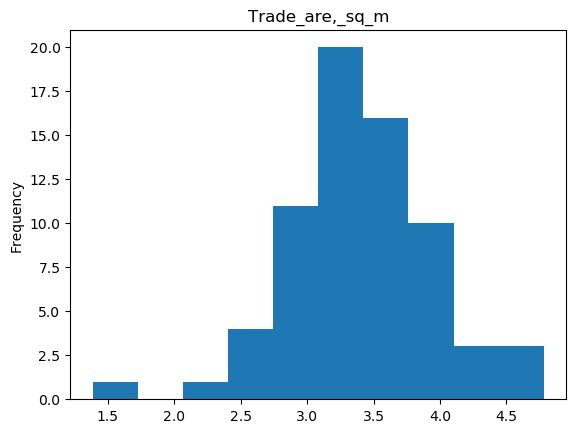

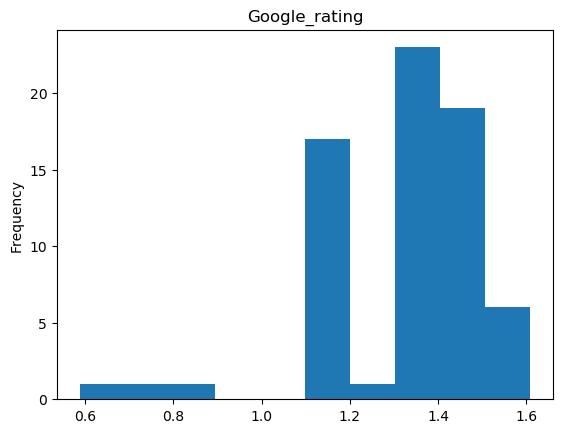

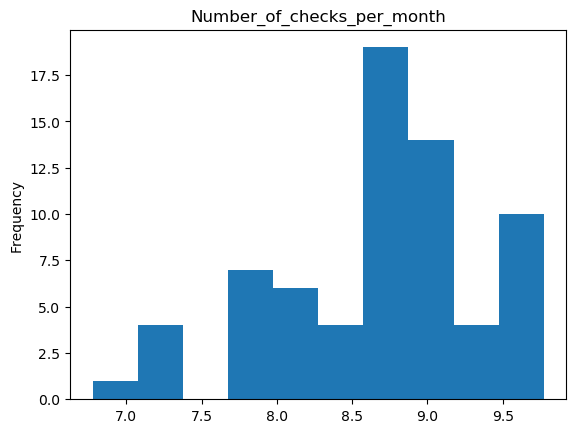

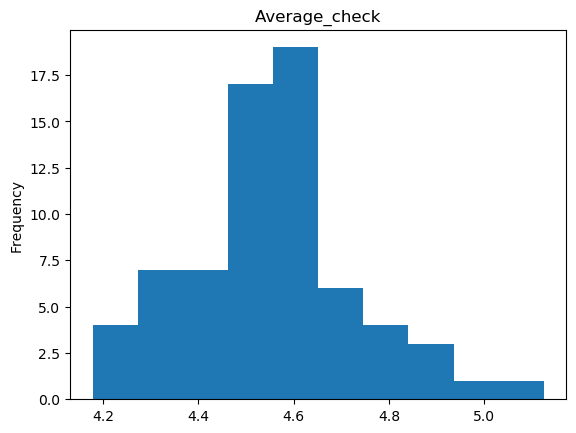

In [14]:
df['Trade_are,_sq_m'].plot(kind = 'hist')
plt.title('Trade_are,_sq_m')
plt.show()
df['Google_rating'].plot(kind = 'hist')
plt.title('Google_rating')
plt.show()
df['Number_of_checks_per_month'].plot(kind = 'hist')
plt.title('Number_of_checks_per_month')
plt.show()
df['Average_check'].plot(kind = 'hist')
plt.title('Average_check')
plt.show()

К сожалению Average_income_of_the_population_UAH и The_average_population не удалось прологарифмировать из-за возникновения в парарметрах некорректных для программы значений. Поэтому их мы оставляем без изменений.

In [15]:
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

df = outliers(df)
df.describe()

,"Trade_are,_sq_m",Number_of_employees_in_the_store,Google_rating,Number_of_checks_per_month,Average_check,Average_income_of_the_population_UAH,The_average_population,Fast_food,Takeaway_coffee,Pizzeria,Highway_street,Intra-quarter_road
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,3.399037,1.869565,1.320309,8.676576,4.546429,11368.652951,6061.312500,0.202899,0.217391,0.081606,0.449275,0.376812
std,0.554679,0.838645,0.199728,0.676795,0.176911,2086.936699,4244.422752,0.405104,0.415493,0.266369,0.501065,0.488137
min,1.686764,1.000000,0.701519,6.777647,4.178533,4264.834902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.091042,1.000000,1.098612,8.225235,4.441003,10296.000000,1712.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.314186,2.000000,1.386294,8.808967,4.554087,11427.000000,6061.312500,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.713572,2.000000,1.458615,9.053453,4.617198,12948.000000,9213.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4.781641,4.000000,1.609438,9.772068,5.083417,14937.000000,14157.000000,1.000000,1.000000,0.938463,1.000000,1.000000


На этом этапе мы избавились от выбросов.

In [16]:
dfs = df
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
2,Type,4,"[Social, Standard, Premium, Social Plus]",object
0,"Trade_are,_sq_m",52,"[2.1972245773362196, 3.091042453358316, 2.5649...",float64
7,The_average_population,64,"[3807.0, 9086.0, 6383.0, 4.0, 426.0, 1618.0, 9...",float64
9,Takeaway_coffee,2,"[1.0, 0.0]",float64
10,Pizzeria,2,"[0.0, 0.9384633852575202]",float64
1,Number_of_employees_in_the_store,4,"[1.0, 2.0, 3.0, 4.0]",float64
4,Number_of_checks_per_month,67,"[7.114769448366463, 7.906547232368036, 6.77764...",float64
12,Intra-quarter_road,2,"[0.0, 1.0]",float64
11,Highway_street,2,"[1.0, 0.0]",float64
3,Google_rating,14,"[1.0986122886681098, 1.410986973710262, 1.3862...",float64


In [17]:
t = {'Premium':1,'Standard':2,'Social Plus':3,'Social':4}

df.iloc[:,2] = df.iloc[:,2].map(t)
df

,"Trade_are,_sq_m",Number_of_employees_in_the_store,Type,Google_rating,Number_of_checks_per_month,Average_check,Average_income_of_the_population_UAH,The_average_population,Fast_food,Takeaway_coffee,Pizzeria,Highway_street,Intra-quarter_road
0,2.197225,1.0,4,1.098612,7.114769,4.341855,13884.0,3807.0,1.0,1.0,0.000000,1.0,0.0
1,3.091042,1.0,4,1.410987,7.906547,4.441003,11700.0,9086.0,0.0,0.0,0.000000,1.0,0.0
2,2.564949,1.0,4,1.098612,6.777647,4.718677,6786.0,6383.0,0.0,0.0,0.000000,1.0,0.0
3,2.890372,1.0,2,1.098612,7.760467,4.785824,12948.0,4.0,1.0,1.0,0.938463,1.0,0.0
4,3.218876,1.0,4,1.386294,7.840706,4.552613,11427.0,426.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,3.708192,3.0,1,1.386294,9.514289,4.676281,9399.0,12018.0,0.0,0.0,0.000000,1.0,1.0
65,3.068053,2.0,1,0.832909,8.935640,4.490096,14079.0,10121.0,0.0,0.0,0.000000,0.0,0.0
66,4.746930,1.0,2,1.098612,8.599879,4.659848,11427.0,7221.0,0.0,0.0,0.000000,1.0,0.0
67,3.549617,2.0,4,1.458615,8.383662,5.083417,13338.0,3137.0,0.0,0.0,0.000000,0.0,0.0


Мы закодировали нашу категориальную переменную.

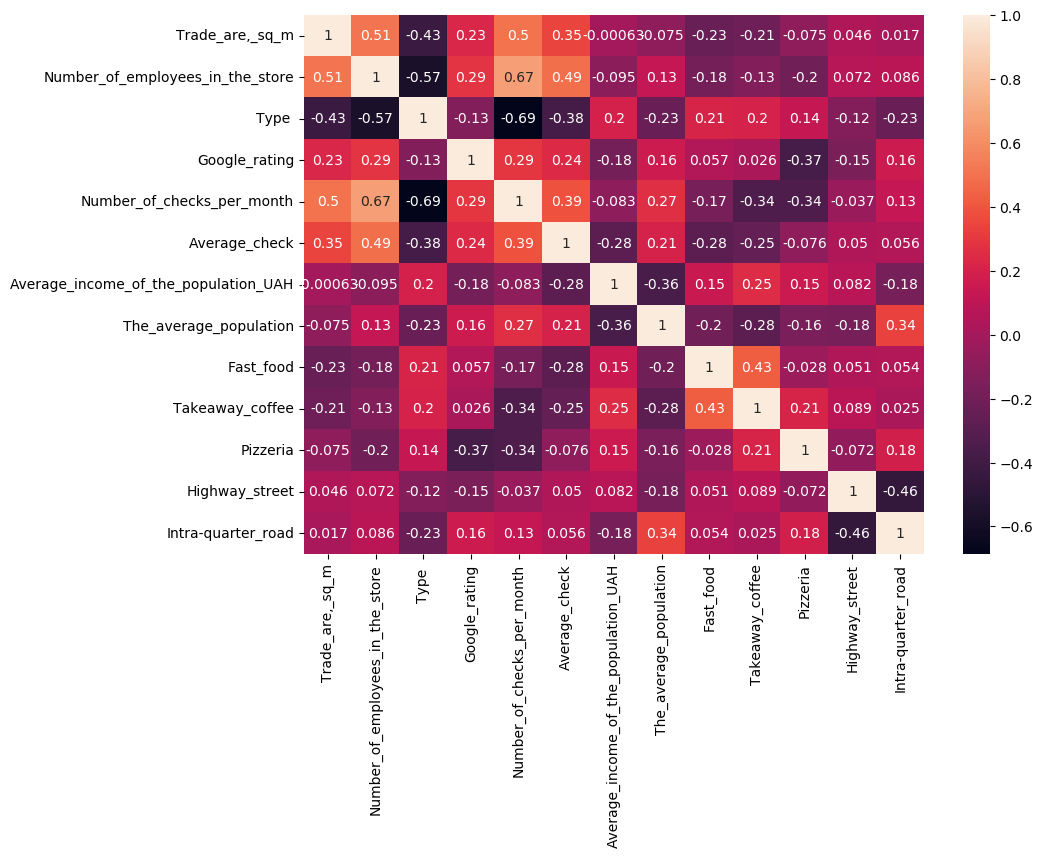

In [18]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, annot=True)
plt.show()

Number_of_checks_per_month будет объясняемой перемоенной. Наибольшее влияние на данную перерменную имеет Type и Number_of_employees_in_the_store. У параметра Type наблюдается достаточно высокая корреляция с независимой переменной Number_of_employees_in_the_store. Стоит избавиться от одной из этих двух переменных, так как они связаны между собой. 

In [19]:
df = df[['Trade_are,_sq_m','Number_of_employees_in_the_store','Google_rating','Number_of_checks_per_month','Average_check','Average_income_of_the_population_UAH','The_average_population','Fast_food','Takeaway_coffee','Pizzeria','Highway_street','Intra-quarter_road']]
df.head(5)

,"Trade_are,_sq_m",Number_of_employees_in_the_store,Google_rating,Number_of_checks_per_month,Average_check,Average_income_of_the_population_UAH,The_average_population,Fast_food,Takeaway_coffee,Pizzeria,Highway_street,Intra-quarter_road
0,2.197225,1.0,1.098612,7.114769,4.341855,13884.0,3807.0,1.0,1.0,0.000000,1.0,0.0
1,3.091042,1.0,1.410987,7.906547,4.441003,11700.0,9086.0,0.0,0.0,0.000000,1.0,0.0
2,2.564949,1.0,1.098612,6.777647,4.718677,6786.0,6383.0,0.0,0.0,0.000000,1.0,0.0
3,2.890372,1.0,1.098612,7.760467,4.785824,12948.0,4.0,1.0,1.0,0.938463,1.0,0.0
4,3.218876,1.0,1.386294,7.840706,4.552613,11427.0,426.0,0.0,0.0,0.000000,0.0,0.0


Была вынуждена удалить столбец Type таким образом, потому что программа никак не хотела находить его в базе данных. До этого мне удавалось обойти этот лаг, но сейчас не неашла другого выхода. 

In [20]:
# Multiple Linear Regression

In [21]:
X = df.iloc[:, [0,1,2,4,5,6,7,8,9,10,11]]
y = df['Number_of_checks_per_month']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [22]:
# !pip install statsmodels

In [23]:
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Number_of_checks_per_month   R-squared:                       0.640
Model:                                    OLS   Adj. R-squared:                  0.549
Method:                         Least Squares   F-statistic:                     6.964
Date:                        Thu, 21 Oct 2021   Prob (F-statistic):           1.37e-06
Time:                                14:34:17   Log-Likelihood:                -27.402
No. Observations:                          55   AIC:                             78.80
Df Residuals:                              43   BIC:                             102.9
Df Model:                                  11                                         
Covariance Type:                    nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    4.7296      2.203      2.147      0.037       0.288       9.172
Trade_are,_sq_m                          0.4720      0.175      2.697      0.010       0.119       0.825
Number_of_employees_in_the_store         0.2327      0.103      2.255      0.029       0.025       0.441
Google_rating                           -0.4719      0.377     -1.251      0.218      -1.233       0.289
Average_check                            0.5436      0.476      1.141      0.260      -0.417       1.504
Average_income_of_the_population_UAH -1.168e-05   3.51e-05     -0.333      0.741   -8.24e-05     5.9e-05
The_average_population                2.807e-05   1.78e-05      1.573      0.123   -7.91e-06     6.4e-05
Fast_food                                0.0202      0.175      0.116      0.909      -0.333       0.373
Takeaway_coffee                         -0.2946      0.174     -1.691      0.098      -0.646       0.057
Pizzeria                                -0.6545      0.276     -2.367      0.022      -1.212      -0.097
Highway_street                           0.1427      0.147      0.973      0.336      -0.153       0.438
Intra-quarter_road                       0.1764      0.160      1.102      0.277      -0.146       0.499
==============================================================================
Omnibus:                        1.168   Durbin-Watson:                   2.346
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                0.694
Skew:                          -0.267   Prob(JB):                        0.707
Kurtosis:                       3.131   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Наша зависимая переменная благодаря имеющимся параметрам объясняется на 64%. По р-значению видим, что большинство факторов незначимы. Уровень значимости меньше 0.05 наблюдается только у переменных Trade_are_sq_m, Pizzeria и Number_of_employees_in_the_store. Эти переменные и будут наиболее весомыми в нашей модели. Теперь приступим к построению многофакторной линейной регрессии.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
n_features = X.shape[1]
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 3)
selector = selector.fit(X, y)

selected_columns=[]
for i in range(n_features):
    if selector.support_[i] == True:
        selected_columns.append(i)
        
f_lm = []
for column in selected_columns:
    f_lm.append(X.columns[column])

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [25]:
mr_rfe = LinearRegression().fit(X_train[f_lm], y_train)
mr_rfe.coef_, mr_rfe.intercept_

(array([ 0.43898971, -0.44895483, -0.51164721]), 8.009410693170294)

Получили коэф при наших значимых параметрах. Как видим, с первым параметром у зависимой переменной прямая зависимость, а со второй - обратная. 

In [26]:
y_pred = mr_rfe.predict(X_test[f_lm])
mr_rfe.score(X_train[f_lm], y_train).round(3), mr_rfe.score(X_test[f_lm], y_test).round(4)

(0.547, 0.4231)

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_train, mr_rfe.predict(X_train[f_lm]))), sqrt(mean_squared_error(y_test, y_pred))

(0.44695787972220685, 0.5107093399425422)

R2 двух выборок находится на среднем уровне. Наблюдается некоторое переобучение модели. Из=за малого количества данных сложно корректно обучить выборку, это может быть одной из причин переобучения.

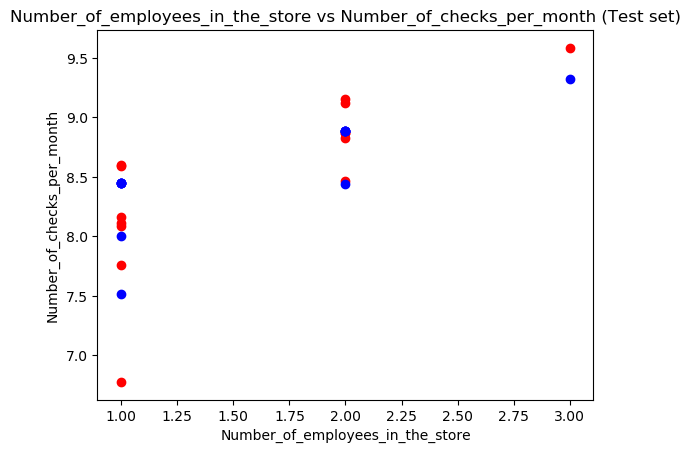

In [28]:
plt.scatter(X_test['Number_of_employees_in_the_store'], y_test, color = 'red')
plt.plot(X_test['Number_of_employees_in_the_store'], mr_rfe.predict(X_test[f_lm]), 'bo')
plt.title('Number_of_employees_in_the_store vs Number_of_checks_per_month (Test set)')
plt.xlabel('Number_of_employees_in_the_store')
plt.ylabel('Number_of_checks_per_month')
plt.show()

In [29]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [30]:
# Regression Neural Network

In [31]:
y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [33]:
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

In [34]:
rnn = Sequential()

rnn.add(Dense(12, activation = 'tanh', input_dim = 11))

rnn.add(Dense(4, activation = 'tanh'))

rnn.add(Dense(1, activation = 'linear'))

rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [35]:
rnn.fit(X_train, y_train, batch_size = 4, epochs = 20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
55/55 [==============================] - 0s 6ms/sample - loss: 1.1386 - acc: 0.0000e+00
Epoch 2/20
55/55 [==============================] - 0s 1ms/sample - loss: 1.0363 - acc: 0.0000e+00
Epoch 3/20
55/55 [==============================] - 0s 2ms/sample - loss: 0.9438 - acc: 0.0000e+00
Epoch 4/20
55/55 [==============================] - 0s 652us/sample - loss: 0.8710 - acc: 0.0000e+00
Epoch 5/20
55/55 [==============================] - 0s 1ms/sample - loss: 0.8116 - acc: 0.0000e+00
Epoch 6/20
55/55 [==============================] - 0s 2ms/sample - loss: 0.7519 - acc: 0.0000e+00
Epoch 7/20
55/55 [==============================] - 0s 450us/sample - loss: 0.6887 - acc: 0.0000e+00
Epoch 8/20
55/55 [==============================] - 0s 433us/sample - loss: 0.6478 - acc: 0.0000e+00
Epoch 9/20
55/55 [==============================] - 0s 2ms/sample - loss: 0.6050 - acc: 0.0000e+00
Epoch 10/20
55/55 [==============================] - 0s

In [36]:
y_pred = rnn.predict(X_test)

In [37]:
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [38]:
from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)))), sqrt(mean_squared_error(y_test, y_hat))

(0.3930525554692491, 0.5647246548241711)

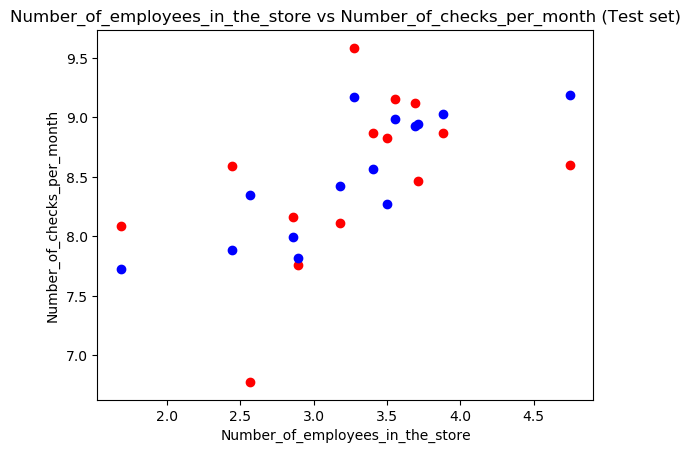

In [39]:
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], y_hat, 'bo')
plt.title('Number_of_employees_in_the_store vs Number_of_checks_per_month (Test set)')
plt.xlabel('Number_of_employees_in_the_store')
plt.ylabel('Number_of_checks_per_month')
plt.show()

Эта нейронная сеть построена на основе всех факторов. Как видно по среднеквадратической ошибке, обучающая модель переобучена. Сейчас посмотрим результаты нейронной сети на значимых факторах. 